/Users/acarossio/Dropbox/Études 2018-2019/X/INF554 - Machine Learning I/Labs/Lab3/NMF/nmf.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  Uk[:,i] = U[:,idx] # extract the kth eigenvectors associated to the k greater singular values


25
(3012, 1000)
(25, 1000)
(3012, 25)
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 

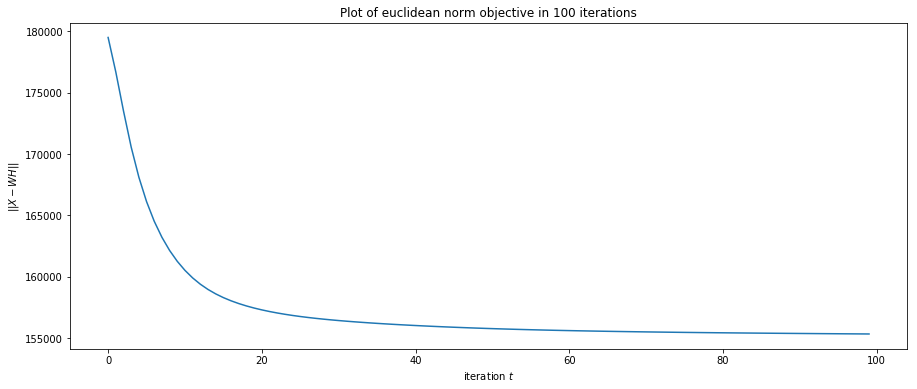


       Topic 1    Weight   Topic 2    Weight Topic 3    Weight  Topic 4    Weight     Topic 5    Weight
0  television  0.008530      city  0.021612     man  0.013006   school  0.026124       music  0.008107
1     network  0.008261     state  0.021056   woman  0.008790    child  0.018498    director  0.007720
2      series  0.008046      plan  0.011628    play  0.008591  student  0.016267    american  0.007241
3   executive  0.007402   project  0.010618   young  0.008437  teacher  0.009443    artistic  0.007207
4         put  0.007213       tax  0.010354    life  0.008250  program  0.008736     company  0.007183
5      comedy  0.006571     build  0.009216    tell  0.007124   parent  0.008412       opera  0.006645
6    audience  0.006545    budget  0.008757    film  0.007006     live  0.008161     general  0.006518
7        star  0.006443  official  0.007825   movie  0.006321     home  0.007517     manager  0.006494
8        idea  0.006259  building  0.007207     age  0.005617   family 

In [2]:
import numpy as np
import pandas as pd
from nmf import *
import matplotlib.pyplot as plt
with open('data/nyt_data.txt') as f:
    documents = f.readlines()
documents = [x.strip().strip('\n').strip("'") for x in documents]

# contains vocabs with rows as index
with open('data/nyt_vocab.dat') as f:
    vocabs = f.readlines()
vocabs = [x.strip().strip('\n').strip("'") for x in vocabs]

'''create matrix X'''
numDoc = 1000
numWord = 3012
X = np.zeros([numWord,numDoc],dtype=float)

for col in range(len(documents[:1000])):
    for row in documents[col].split(','):
        X[int(row.split(':')[0])-1,col] = float(int(row.split(':')[1]))

X=X+np.ones((numWord,numDoc))*0.00000001

rank = 25
W,H,d_iter=nmf_factor(X,rank)

fig= plt.figure(figsize = (15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(range(100),d_iter[:100])
plt.title('Plot of euclidean norm objective in 100 iterations')
plt.ylabel('$||X-WH||$')
plt.xlabel('iteration $t$')
plt.show()


# ### b. Ten words with the largest weight.

'''normalize each column to sum to zero'''
W_normed = W / np.sum(W,axis=0)


'''for each column of W, list the 10 words having the largest weight and show the weight'''
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)
vList = []

for topic in range(rank):
    v = pd.DataFrame(vocabs)
    v[1] = W_normed[:,topic].round(6)
    v = v.sort_values([1, 0], ascending=[0,1]).rename(index=int, columns={0: "Topic {}".format(topic+1), 1: "Weight"}).head(10)
    v = v.reset_index(drop=True)
    vList.append(v)

for num in [5,10,15,20,25]:
    print('\n',(pd.concat(vList[num-5:num], axis=1)),'\n')

